In [1]:
!pip install pandas numpy scikit-learn tensorflow flask matplotlib joblib


In [2]:
import pandas as pd

# Load the merged training and testing datasets
train_data = pd.read_csv(r'D:\Aaknaksha\AG2295 vaishnavi\merged training set.csv')
test_data = pd.read_csv(r'D:\Aaknaksha\AG2295 vaishnavi\merged testing set.csv')

# Display the first few rows of the training and testing datasets
print("Training Data:")
print(train_data.head())

print("\nTesting Data:")
print(test_data.head())


Training Data:
         Date      Time                              Route Direction  Cars  \
0  01-01-2023  00:00:00        Shivajinagar Bus Stand Road   Inbound    40   
1  01-01-2023  00:00:00    Old Mumbai-Pune Highway (NH 60)   Inbound    15   
2  01-01-2023  00:00:00             Mumbai-Pandharpur Road   Inbound    16   
3  01-01-2023  00:00:00                  Sangamwadi Bridge   Inbound    61   
4  01-01-2023  00:00:00  Sangam Bridge (Ground Level Road)   Inbound    46   

   Trucks  Motorcycles  Buses  Car_Weight(kg)  Truck_Weight(kg)  ...  \
0      31           71      9           56680             97898  ...   
1      33          121      0           16665            153978  ...   
2      27          138     12           18624             98550  ...   
3       6          139      7           77531             43650  ...   
4       6           15      7           57270             38700  ...   

   Road Maintenance  Surface Roughness (m/km)  Last Maintenance  \
0    Good Condit

In [3]:
# Strip any leading/trailing spaces from column names in both training and testing data
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

# Rename the column 'average_temperature((°C)_x' to match 'average_temperature(°C)_x' in testing data
test_data.rename(columns={'average_temperature((°C)_x': 'average_temperature(°C)_x'}, inplace=True)

# Rename 'Incident_Count ' column in training data to remove the trailing space
train_data.rename(columns={'Incident_Count ': 'Incident_Count'}, inplace=True)

# Print the updated column names to verify
print("Updated Training Data Columns:")
print(train_data.columns)

print("\nUpdated Testing Data Columns:")
print(test_data.columns)


Updated Training Data Columns:
Index(['Date', 'Time', 'Route', 'Direction', 'Cars', 'Trucks', 'Motorcycles',
       'Buses', 'Car_Weight(kg)', 'Truck_Weight(kg)', 'Motorcycle_Weight(kg)',
       'Bus_Weight(kg)', 'Avg_Speed(m/s)', 'Avg_Weight(kg)', 'Incident_Count',
       'Wear_Index', 'Road Material', 'Road Maintenance',
       'Surface Roughness (m/km)', 'Last Maintenance', 'Road Age (years)',
       'temperature(°C)_x', 'rainfall(mm)_x', 'humidity(%)_x',
       'wind_speed(m/s)_x', 'average_temperature(°C)_x',
       'weather_condition_x'],
      dtype='object')

Updated Testing Data Columns:
Index(['Date', 'Time', 'Route', 'Direction', 'Cars', 'Trucks', 'Motorcycles',
       'Buses', 'Car_Weight(kg)', 'Truck_Weight(kg)', 'Motorcycle_Weight(kg)',
       'Bus_Weight(kg)', 'Avg_Speed(m/s)', 'Avg_Weight(kg)', 'Incident_Count',
       'Wear_Index', 'Road Material', 'Road Maintenance',
       'Surface Roughness (m/km)', 'Last Maintenance', 'Road Age (years)',
       'temperature(°C)_x',

In [4]:
import pandas as pd

# Path to the dataset
file_path = r'D:\Aaknaksha\AG2295 vaishnavi\preprocessed_simulated_road_data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Cars  Trucks  Motorcycles  Buses  Car_Weight(kg)  Truck_Weight(kg)  \
0   148      82           88     49            3784             13968   
1  1873     213           67     10            3946              7595   
2   248     278          430      1            2342              8486   
3   439      42          291     17            4014              9564   
4   798      90          233     36            4134              9424   

   Motorcycle_Weight(kg)  Bus_Weight(kg)  Avg_Speed(m/s)  Avg_Weight(kg)  \
0                    378            2634       18.907281     2316.010131   
1                    433            7442       18.178374     1080.153220   
2                    481            2711       11.464153     2010.140409   
3                    242            6265       13.330556     1978.283100   
4                    280            7170       20.764718     1011.064410   

   Incident_Count  Surface Roughness (m/km)  Road Age (years)  \
0               2                  3.61

In [8]:
# Load the preprocessed dataset again
import pandas as pd

preprocessed_data = pd.read_csv('D:/Aaknaksha/AG2295 vaishnavi/final_preprocessed_road_data.csv')

# Now apply Label Encoding to the categorical column
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'weather_condition_x' column
preprocessed_data['weather_condition_x'] = label_encoder.fit_transform(preprocessed_data['weather_condition_x'])

# Verify the encoding
print(preprocessed_data[['weather_condition_x']].head())


   weather_condition_x
0                    3
1                    1
2                    0
3                    0
4                    3


In [9]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to normalize
numerical_columns = ['Cars', 'Trucks', 'Motorcycles', 'Buses', 'Car_Weight(kg)', 'Truck_Weight(kg)', 
                     'Motorcycle_Weight(kg)', 'Bus_Weight(kg)', 'Avg_Speed(m/s)', 'Avg_Weight(kg)', 
                     'Incident_Count', 'Surface Roughness (m/km)', 'Road Age (years)', 'temperature(°C)_x', 
                     'rainfall(mm)_x', 'humidity(%)_x', 'wind_speed(m/s)_x', 'average_temperature(°C)_x',
                     'weather_condition_x']  # Include encoded categorical column

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the numerical columns
preprocessed_data[numerical_columns] = scaler.fit_transform(preprocessed_data[numerical_columns])

# Verify the normalized data
print(preprocessed_data.head())


       Cars    Trucks  Motorcycles     Buses  Car_Weight(kg)  \
0  0.022703  0.274247     0.084633  1.000000        0.696545   
1  0.933474  0.712375     0.037862  0.204082        0.737106   
2  0.075502  0.929766     0.846325  0.020408        0.335503   
3  0.176346  0.140468     0.536748  0.346939        0.754131   
4  0.365892  0.301003     0.407572  0.734694        0.784176   

   Truck_Weight(kg)  Motorcycle_Weight(kg)  Bus_Weight(kg)  Avg_Speed(m/s)  \
0          0.898927               0.696742        0.078849        0.696055   
1          0.259902               0.834586        0.680601        0.659560   
2          0.349243               0.954887        0.088486        0.323390   
3          0.457335               0.355890        0.533292        0.416838   
4          0.443297               0.451128        0.646558        0.789053   

   Avg_Weight(kg)  Incident_Count  Surface Roughness (m/km)  Road Age (years)  \
0        0.657623        0.222222                  0.321176      

In [10]:
import pandas as pd

# Path to the dataset
file_path = r'D:\Aaknaksha\AG2295 vaishnavi\preprocessed_simulated_road_data.csv'

# Load the dataset
preprocessed_data = pd.read_csv(file_path)

# Features (X) and target (y) for model training
X = preprocessed_data.drop('Wear_Index', axis=1)  # Drop 'Wear_Index' column from features
y = preprocessed_data['Wear_Index']  # 'Wear_Index' is the target variable

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (800, 19), (800,)
Testing set shape: (200, 19), (200,)


In [13]:
# Path to save the processed dataset
processed_data_path = r'D:\Aaknaksha\AG2295 vaishnavi\final_preprocessed_road_data.csv'

# Save the processed data to a CSV file
preprocessed_data.to_csv(processed_data_path, index=False)

print(f"Processed data saved to: {processed_data_path}")


Processed data saved to: D:\Aaknaksha\AG2295 vaishnavi\final_preprocessed_road_data.csv


In [14]:
import pandas as pd

# Load the preprocessed dataset
preprocessed_data = pd.read_csv('D:/Aaknaksha/AG2295 vaishnavi/final_preprocessed_road_data.csv')

# Display the first few rows of the data
print(preprocessed_data.head())


   Cars  Trucks  Motorcycles  Buses  Car_Weight(kg)  Truck_Weight(kg)  \
0   148      82           88     49            3784             13968   
1  1873     213           67     10            3946              7595   
2   248     278          430      1            2342              8486   
3   439      42          291     17            4014              9564   
4   798      90          233     36            4134              9424   

   Motorcycle_Weight(kg)  Bus_Weight(kg)  Avg_Speed(m/s)  Avg_Weight(kg)  \
0                    378            2634       18.907281     2316.010131   
1                    433            7442       18.178374     1080.153220   
2                    481            2711       11.464153     2010.140409   
3                    242            6265       13.330556     1978.283100   
4                    280            7170       20.764718     1011.064410   

   Incident_Count  Surface Roughness (m/km)  Road Age (years)  \
0               2                  3.61

In [15]:
# Features (X) and target (y) for model training
X = preprocessed_data.drop('Wear_Index', axis=1)  # Drop the target column from the features
y = preprocessed_data['Wear_Index']  # 'Wear_Index' is the target variable

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (800, 19)
Testing data shape: (200, 19)


In [17]:
# List of all categorical columns
categorical_columns = ['weather_condition_x']  # Add more columns if there are others

# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
for col in categorical_columns:
    preprocessed_data[col] = label_encoder.fit_transform(preprocessed_data[col])

# Check the encoded columns to ensure proper encoding
print(preprocessed_data[categorical_columns].head())


   weather_condition_x
0                    3
1                    1
2                    0
3                    0
4                    3


In [18]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to normalize
numerical_columns = ['Cars', 'Trucks', 'Motorcycles', 'Buses', 'Car_Weight(kg)', 'Truck_Weight(kg)', 
                     'Motorcycle_Weight(kg)', 'Bus_Weight(kg)', 'Avg_Speed(m/s)', 'Avg_Weight(kg)', 
                     'Incident_Count', 'Surface Roughness (m/km)', 'Road Age (years)', 'temperature(°C)_x', 
                     'rainfall(mm)_x', 'humidity(%)_x', 'wind_speed(m/s)_x', 'average_temperature(°C)_x',
                     'weather_condition_x']  # Ensure encoded categorical column is also here

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the numerical columns
preprocessed_data[numerical_columns] = scaler.fit_transform(preprocessed_data[numerical_columns])

# Verify the normalized data
print(preprocessed_data.head())


       Cars    Trucks  Motorcycles     Buses  Car_Weight(kg)  \
0  0.022703  0.274247     0.084633  1.000000        0.696545   
1  0.933474  0.712375     0.037862  0.204082        0.737106   
2  0.075502  0.929766     0.846325  0.020408        0.335503   
3  0.176346  0.140468     0.536748  0.346939        0.754131   
4  0.365892  0.301003     0.407572  0.734694        0.784176   

   Truck_Weight(kg)  Motorcycle_Weight(kg)  Bus_Weight(kg)  Avg_Speed(m/s)  \
0          0.898927               0.696742        0.078849        0.696055   
1          0.259902               0.834586        0.680601        0.659560   
2          0.349243               0.954887        0.088486        0.323390   
3          0.457335               0.355890        0.533292        0.416838   
4          0.443297               0.451128        0.646558        0.789053   

   Avg_Weight(kg)  Incident_Count  Surface Roughness (m/km)  Road Age (years)  \
0        0.657623        0.222222                  0.321176      

In [19]:
# Features (X) and target (y) for LSTM model
X = preprocessed_data.drop('Wear_Index', axis=1)  # Drop 'Wear_Index' from features
y = preprocessed_data['Wear_Index']  # 'Wear_Index' is the target variable

# Reshape the data for LSTM input (LSTM expects 3D input: [samples, timesteps, features])
X_lstm = X.values.astype(np.float32).reshape(X.shape[0], 1, X.shape[1])

# Check the shape of the data for LSTM
print(f"Shape of LSTM input data: {X_lstm.shape}")


Shape of LSTM input data: (1000, 1, 19)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, return_sequences=False, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
lstm_model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
lstm_model.add(Dense(units=1))  # Output layer for road wear prediction
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_lstm, y, epochs=50, batch_size=64)

# Save the trained LSTM model
lstm_model.save('road_wear_lstm_model.h5')


Epoch 1/50
16/16 [==============================] - 2s 3ms/step - loss: 472650.4375
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 471767.2812
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 470457.0625
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 468538.7812
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 466005.8438
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 463027.3125
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 459785.0625
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 456529.5000
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 453305.2500
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 450168.5625
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 447230.5625
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 4

In [21]:
# Predict using the trained LSTM model
lstm_predictions = lstm_model.predict(X_lstm)

# Calculate Mean Absolute Error (MAE) for evaluation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, lstm_predictions)
print(f"Mean Absolute Error (LSTM): {mae}")


32/32 [==============================] - 1s 2ms/step
Mean Absolute Error (LSTM): 545.7925879362666


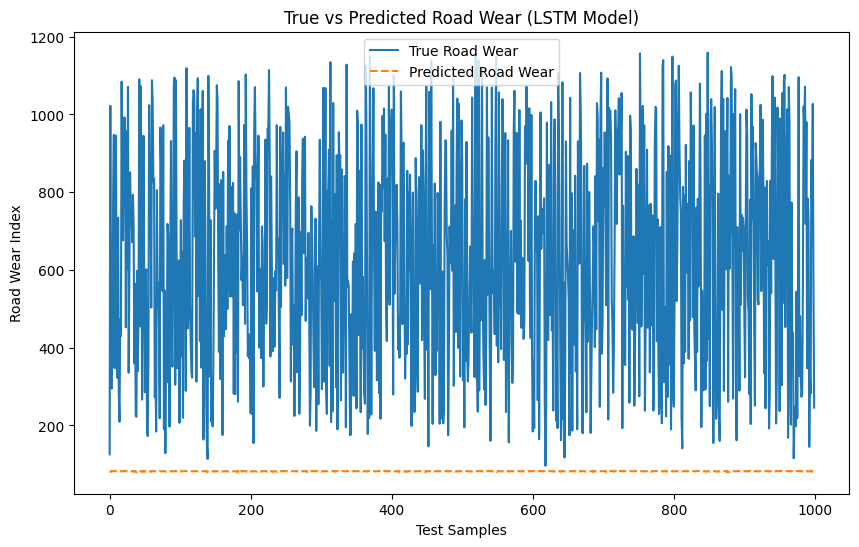

In [22]:
import matplotlib.pyplot as plt

# Plot the true vs predicted road wear
plt.figure(figsize=(10, 6))
plt.plot(y.values, label="True Road Wear")
plt.plot(lstm_predictions, label="Predicted Road Wear", linestyle="--")
plt.legend()
plt.title("True vs Predicted Road Wear (LSTM Model)")
plt.xlabel("Test Samples")
plt.ylabel("Road Wear Index")
plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns (in this case, 'weather_condition_x')
categorical_columns = ['weather_condition_x']  # Add more columns if needed

label_encoder = LabelEncoder()

# Apply Label Encoding to the categorical columns
for col in categorical_columns:
    preprocessed_data[col] = label_encoder.fit_transform(preprocessed_data[col])

# Verify the encoding was successful
print(preprocessed_data[categorical_columns].head())


   weather_condition_x
0                    3
1                    1
2                    0
3                    0
4                    3


In [27]:
# List of numerical columns
numerical_columns = ['Cars', 'Trucks', 'Motorcycles', 'Buses', 'Car_Weight(kg)', 'Truck_Weight(kg)', 
                     'Motorcycle_Weight(kg)', 'Bus_Weight(kg)', 'Avg_Speed(m/s)', 'Avg_Weight(kg)', 
                     'Incident_Count', 'Surface Roughness (m/km)', 'Road Age (years)', 'temperature(°C)_x', 
                     'rainfall(mm)_x', 'humidity(%)_x', 'wind_speed(m/s)_x', 'average_temperature(°C)_x', 
                     'weather_condition_x']  # Make sure the encoded columns are included

# Ensure that all values in numerical columns are numeric
preprocessed_data[numerical_columns] = preprocessed_data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Verify that all columns are numeric now
print(preprocessed_data[numerical_columns].dtypes)


Cars                         float64
Trucks                       float64
Motorcycles                  float64
Buses                        float64
Car_Weight(kg)               float64
Truck_Weight(kg)             float64
Motorcycle_Weight(kg)        float64
Bus_Weight(kg)               float64
Avg_Speed(m/s)               float64
Avg_Weight(kg)               float64
Incident_Count               float64
Surface Roughness (m/km)     float64
Road Age (years)             float64
temperature(°C)_x            float64
rainfall(mm)_x               float64
humidity(%)_x                float64
wind_speed(m/s)_x            float64
average_temperature(°C)_x    float64
weather_condition_x            int64
dtype: object


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the numerical columns
preprocessed_data[numerical_columns] = scaler.fit_transform(preprocessed_data[numerical_columns])

# Verify the normalized data
print(preprocessed_data.head())


       Cars    Trucks  Motorcycles     Buses  Car_Weight(kg)  \
0  0.022703  0.274247     0.084633  1.000000        0.696545   
1  0.933474  0.712375     0.037862  0.204082        0.737106   
2  0.075502  0.929766     0.846325  0.020408        0.335503   
3  0.176346  0.140468     0.536748  0.346939        0.754131   
4  0.365892  0.301003     0.407572  0.734694        0.784176   

   Truck_Weight(kg)  Motorcycle_Weight(kg)  Bus_Weight(kg)  Avg_Speed(m/s)  \
0          0.898927               0.696742        0.078849        0.696055   
1          0.259902               0.834586        0.680601        0.659560   
2          0.349243               0.954887        0.088486        0.323390   
3          0.457335               0.355890        0.533292        0.416838   
4          0.443297               0.451128        0.646558        0.789053   

   Avg_Weight(kg)  Incident_Count  Surface Roughness (m/km)  Road Age (years)  \
0        0.657623        0.222222                  0.321176      

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Prepare features (X) and target (y)
X = preprocessed_data.drop('Wear_Index', axis=1)  # Features
y = preprocessed_data['Wear_Index']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Model (GBM)
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train, y_train)

# Predict using the GBM model
gbm_predictions = gbm_model.predict(X_test)

# Evaluate the GBM model's MAE
from sklearn.metrics import mean_absolute_error
mae_gbm = mean_absolute_error(y_test, gbm_predictions)
print(f"Mean Absolute Error (GBM): {mae_gbm}")


Mean Absolute Error (GBM): 8.171820915849024


In [32]:
# Reshape X_test for LSTM model (LSTM expects 3D input: [samples, timesteps, features])
X_test_lstm = X_test.values.astype(np.float32).reshape(X_test.shape[0], 1, X_test.shape[1])

# Check the shape of X_test_lstm
print(f"Shape of X_test_lstm: {X_test_lstm.shape}")


Shape of X_test_lstm: (200, 1, 19)


In [33]:
# Make sure both models are predicting on the same test data
lstm_predictions = lstm_model.predict(X_test_lstm)  # LSTM model (reshaped input)
gbm_predictions = gbm_model.predict(X_test)  # GBM model (original input)

# Ensure that the predictions are one-dimensional
lstm_predictions = lstm_predictions.flatten()  # Flatten LSTM predictions
gbm_predictions = gbm_predictions.flatten()  # Flatten GBM predictions

# Verify shapes match
print(f"Shape of LSTM predictions: {lstm_predictions.shape}")
print(f"Shape of GBM predictions: {gbm_predictions.shape}")


7/7 [==============================] - 0s 1ms/step
Shape of LSTM predictions: (200,)
Shape of GBM predictions: (200,)


In [34]:
# Combine predictions (simple average)
combined_predictions = (lstm_predictions + gbm_predictions) / 2

# Evaluate the combined model's Mean Absolute Error (MAE)
mae_combined = mean_absolute_error(y_test, combined_predictions)
print(f"Mean Absolute Error (Hybrid Model): {mae_combined}")


Mean Absolute Error (Hybrid Model): 264.47822558301556


In [35]:
# Weighted average (LSTM has more weight in this example)
combined_predictions = (0.6 * lstm_predictions + 0.4 * gbm_predictions)


In [36]:
# Save the LSTM model
lstm_model.save('road_wear_lstm_model.h5')

# Save the GBM model
import joblib
joblib.dump(gbm_model, 'road_wear_gbm_model.pkl')


['road_wear_gbm_model.pkl']

In [40]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib
import pandas as pd

# Assuming you have your training data (train_data) loaded as a DataFrame

# Example training data
train_data = pd.DataFrame({
    'weather_condition_x': ['Clear skies', 'Rainy', 'Stormy', 'Clear skies'],
    'Cars': [100, 200, 150, 120],
    'Trucks': [50, 70, 60, 55],
    # Add other features as needed
})

# Initialize the LabelEncoder and fit it to the 'weather_condition_x' column
label_encoder = LabelEncoder()
train_data['weather_condition_x'] = label_encoder.fit_transform(train_data['weather_condition_x'])

# Initialize the MinMaxScaler and fit it to the features
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_normalized = scaler.fit_transform(train_data[['Cars', 'Trucks']])  # Normalize specific columns

# Save the LabelEncoder and Scaler
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Print confirmation
print("LabelEncoder and Scaler saved successfully.")


LabelEncoder and Scaler saved successfully.
